<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/%E5%BE%AA%E7%8E%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 5.4 - 循环神经网络




This notebook contains all demo codes in Section 5.4.

## Recurrent Neural Network (RNN)
![alt text](https://docs.google.com/uc?export=download&id=13Zo2LzEM_D032k_l-E05LSD2wNZGIP03)



**RNN Model:**

$\bullet$    Input Layer $(x_{t})_{t = 1}^{T}$

$\bullet$  Hidden Layer $(s_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
s_{t} = h({\color{blue}U}x_{t} + {\color{blue}W}s_{t-1}).
\end{eqnarray*}
$\bullet$  Output Layer $(o_{t})_{t = 1}^{T}$:
\begin{eqnarray*}
o_{t} = g({\color{blue}V}s_{t}).
\end{eqnarray*}
where ${(\color{blue}U}, {\color{blue}W}, {\color{blue}V })$ are RNN parameters to learn from data.





## Long Short Term Memory (LSTM) 
![alt text](https://docs.google.com/uc?export=download&id=11bSZaP3i1P9mvW1HLv__d71lzATaqlvz)

\begin{eqnarray*}
&&f_{t} = \sigma_{g}(W_{f}x_{t} + U_{f}h_{t-1} + b_{f});\\
&&i_{t} = \sigma_{g}(W_{i}x_{t} + U_{i}h_{t-1} + b_{i})\\
&& o_{t} = \sigma_{g}(W_{o}x_{t} + U_{o}h_{t-1} + b_{o})\\
&&c_{t} = f_{t} \circ c_{t-1} + i_{t} \circ \sigma_{c}(W_{c}x_{t} + U_{c}h_{t-1} + b_{c})\\
&& h_{t} = o_{t} \circ \sigma_{h}(c_{t})
\end{eqnarray*}
where the inital values are $c_{0} = h_{0} =0$ and the operator $\circ$ denotes the Hadamard product (elementwise product) and 



*   $x_{t} \in \mathbb{R}^{d}:$ input vector of the LSTM unit;
*   $f_{t} \in \mathbb{R}^{h}:$ forget gate's activation vector;
*   $i_{t} \in \mathbb{R}^{h}:$ output gate's activation vector;
*   $o_{t} \in \mathbb{R}^{h}:$ hidden state vector also known as output vector of the LSTM unit;
*   $c_{t} \in \mathbb{R}^{h}$: cell state vector;
*   $W \in \mathbb{R}^{h \times d}, U \in \mathbb{R}^{h \times h}$ and $b \in \mathbb{R}^{h}$: weight matrices and bias vector parameters which need  need to be learned during training
where the superscripts $d$ and $h$ refer to the number of input features and number of hidden units, respectively. 

Typically the activation functions are chosen as follows:
*  $\sigma _{g}$ is a sigmoid function;
*   $\sigma_{c}$ is hyperbolic tangent function;
*   $\sigma_{h}$ is a hyperbolic tangent function. 


**Sucessful Application of RNN and its variants, e.g. LSTM:**

1.   Speech Recognition;
2.   Natural Language Processing;
3.   Machine Translation.


## RNN Classification##
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}

#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


# Application on High Frequency Financial Data Forecasting

In the following, let us consider the problem of forecasting the direction of future price movements using the previous lagged values of limit order book information (price level and the volume).

[1] Sirignano, J. and Cont, R., 2018. Universal features of price formation in financial markets: perspectives from Deep Learning.

**Input: **$X_{t}:=(LOB_{t-p+1}, LOB_{t-p+2}, \cdots, LOB_{t}$,

where $LOB_{t} = (AskPrice_{1}(t), AskVol_{1}(t), BidPrice_{1}(t), BidVol_{1}(t), \cdots, AskPrice_{10}(t), AskVol_{10}(t), BidPrice_{10}(t), BidVol_{10}(t))$ 

**Output: **$Y_{t}:=\mathbf{1}(MidPrice(t+1)>MidPrice(t))$

**Model:** $Y_t = f(X_{t}) + \varepsilon_{t}$

## 加载限价委托单薄数据

The data is downloaded from LOBSTER.

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
cd /gdrive/My Drive/Colab Notebooks/High Frequency Data/

/gdrive/My Drive/Colab Notebooks/High Frequency Data


In [0]:
import numpy as np
import pandas as pd

def import_orderbook(filedir):
  """ 加载orderbook数据 """
  orderbook0 = pd.read_csv(filedir,header=None).values.astype(float)
  N_col = np.shape(orderbook0)[1]  
  # 将价格除以10,000进行标准化
  orderbook0[:,0::2]=(orderbook0[:,0::2]/1e4)
  str_sets = []
  for i in range(int(N_col/4)):
    str_sets.append('ask price '+str(i+1))
    str_sets.append('ask size '+str(i+1))
    str_sets.append('bid price '+str(i+1))
    str_sets.append('bid size '+str(i+1))    
  df_orderbook0 =  pd.DataFrame(orderbook0, columns = str_sets)
  return orderbook0, df_orderbook0 

def import_message(filedir):
  """ 加载message数据 """
  message=pd.read_csv(filedir,header=None).values
  df_message = pd.DataFrame(message, columns=['Time', 'Type', 'Order ID', 'Size', 'Price', 'Direction'])
  df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']] = df_message[['Type', 'Order ID', 'Size', 'Price', 'Direction']].astype('int')
  return message, df_message
  
orderbook, df_orderbook = import_orderbook('orderbook.csv')
message, df_message = import_message('message.csv')

# 查看数据集的维度
print('dimension of the data in orderbook.csv = {}'.format(orderbook.shape))
print('dimension of the data in message.csv = {}'.format(message.shape))

dimension of the data in orderbook.csv = (155935, 20)
dimension of the data in message.csv = (155935, 6)


In [0]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0,224.40,547.0,222.62,100.0
1,223.95,100.0,223.81,21.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0,224.40,547.0,223.00,10.0
2,223.95,100.0,223.81,21.0,223.96,20.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.00,10.0
3,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,220.0,223.07,200.0,224.25,100.0,223.04,100.0
4,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.18,100.0,224.00,233.0,223.07,200.0,224.25,100.0,223.04,100.0


In [0]:
df_message.head(10)

,Time,Type,Order ID,Size,Price,Direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.189608,1,3911376,20,2239600,-1
3,34200.189608,1,11534792,100,2237500,1
4,34200.189608,1,1365373,13,2240000,-1
5,34200.189608,1,11474176,2,2236500,1
6,34200.189608,1,1847685,100,2240000,-1
7,34200.189608,1,3920359,15,2236000,1
8,34200.189608,1,3578212,4,2240000,-1
9,34200.189608,1,4632045,100,2235000,1


## **删除中间价没有发生变化的数据**

In [0]:
from keras.utils import to_categorical

def RemoveNoNextPriceChangeEvent(df_orderbook):
  """ 删除中间价没有发生变化的数据 """ 
  orderbook = df_orderbook.values 
  midprice=(orderbook[:,0]+orderbook[:,2])/2
  simple_return = midprice[1:]-midprice[:-1]
  sign_vec = np.sign(simple_return)
  index0 = np.where(sign_vec!=0)
  print(midprice[0:10])
  print(index0[0:10])
  orderbook = orderbook[:-1, :]
  sign_vec = sign_vec[index0[0]]
  sign_vec = sign_vec*0.5+0.5
  sign_vec = sign_vec.astype('int')
  label = to_categorical(sign_vec, num_classes=2,dtype='float32')
  df_orderbook = df_orderbook.iloc[index0]
  orderbook = df_orderbook.values
  return orderbook, df_orderbook, label

orderbook, df_orderbook, label = RemoveNoNextPriceChangeEvent(df_orderbook)

# 再次查看数据集的维度
print('dimension of the data after removing no next price change = {}'.format(orderbook.shape))
print('dimension of the label for the next price movement after removing no next price change = {}'.format(label.shape))

[223.565 223.88  223.88  223.88  223.88  223.88  223.88  223.88  223.88
 223.88 ]
(array([     0,     27,     36, ..., 155930, 155932, 155933]),)
dimension of the data after removing no next price change = (27557, 20)
dimension of the label for the next price movement after removing no next price change = (27557, 2)


In [0]:
df_orderbook.head()

,ask price 1,ask size 1,bid price 1,bid size 1,ask price 2,ask size 2,bid price 2,bid size 2,ask price 3,ask size 3,bid price 3,bid size 3,ask price 4,ask size 4,bid price 4,bid size 4,ask price 5,ask size 5,bid price 5,bid size 5
0,223.95,100.0,223.18,100.0,223.99,100.0,223.07,200.0,224.00,220.0,223.04,100.0,224.25,100.0,223.0,10.0,224.40,547.0,222.62,100.0
27,223.95,100.0,223.81,21.0,223.96,20.0,223.75,100.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.6,15.0,224.24,20.0,223.50,100.0
36,223.95,100.0,223.75,74.0,223.96,306.0,223.65,2.0,223.99,100.0,223.60,15.0,224.00,1451.0,223.5,100.0,224.24,20.0,223.49,50.0
38,223.96,286.0,223.75,74.0,223.99,100.0,223.65,2.0,224.00,1451.0,223.60,15.0,224.24,20.0,223.5,100.0,224.25,100.0,223.49,50.0
40,223.99,100.0,223.75,74.0,224.00,1451.0,223.65,2.0,224.24,20.0,223.62,286.0,224.25,100.0,223.6,15.0,224.30,500.0,223.50,100.0


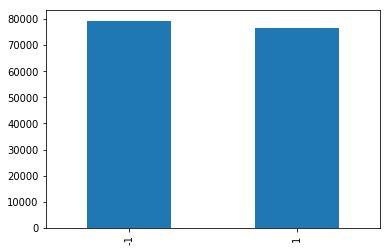

In [0]:
count_message = df_message['Direction'].value_counts().sort_index()
count_message.plot(kind='bar')


## **准备训练数据**

In [0]:
def P_Lagged_data(X, p):
  """ 计算p阶滞后项 """
  n = X.shape[0]
  LaggedX = np.zeros([n-p, p, X.shape[1]])
  for i in range(n-p):
    LaggedX[i,:,:]=X[i:(i+p),:]
  return LaggedX

def GenerateLaggedValueInputOutput(df_orderbook, label, p):
  """ 准备训练需要的输入和输出数据 """
  orderbook = df_orderbook.values
  inputX = P_Lagged_data(orderbook, p) 
  outputY = label[p:]
  return inputX, outputY 

nTimes = df_orderbook.shape[0]
inputX, outputY = GenerateLaggedValueInputOutput(df_orderbook, label, p=50)

# 查看输入和输出的维度
print(inputX.shape)
print(outputY.shape)

(27507, 50, 20)
(27507, 2)


## **预处理限价委托单薄数据集中的数据**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 划分训练集和测试集, 这里需要将参数shuffle设置为False, 因为我们希望使用前90%的数据作为训练集, 其他作为测试集.
# 参数shuffle的默认值是True, 默认情况下将会从整个数据集中随机选择测试集数据.
X_train, X_test, y_train, y_test = train_test_split(inputX, outputY, test_size=0.1, shuffle = False)

def Normalize3D_tensor_Data(X_train, X_test):
  """ 标准化三维张量输入数据 """
  dim_train = np.shape(X_train)
  print(dim_train)
  X_train_scaled = np.zeros(np.shape(X_train), dtype = float)
  X_test_scaled = np.zeros(np.shape(X_test), dtype = float)
  for i in range(dim_train[1]):
    scaler = preprocessing.StandardScaler().fit(X_train[:, i, :])
    X_train_scaled[:, i, :] = scaler.transform(X_train[:, i, :])  
    X_test_scaled[:, i, :] = scaler.transform(X_test[:, i, :])  
  return X_train_scaled, X_test_scaled
 
X_train_scaled, X_test_scaled = Normalize3D_tensor_Data(X_train, X_test)

(24756, 50, 20)


## 使用LSTM预测价格变动方向

In [0]:

# import tensorflow + keras ...
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.merge import concatenate
from keras import optimizers
from keras import metrics
import keras.backend as K
from keras.models import Sequential
# import matplotlib...
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib
import pylab

### **单层LSTM**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import optimizers
from keras import metrics

def LSTM_Single_Layer(input_shape, nodes, dropout):
    """ 使用单层LSTM构建循环神经网络 """
    model = Sequential()
    model.add(LSTM(nodes,dropout=dropout,input_shape= input_shape,use_bias= True))
    model.add(Dense(10, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax', use_bias= True))
    adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy])
    return model

LightLSTM_Model = LSTM_Single_Layer(X_train_scaled.shape[1:], 30,0.15)

# 查看LSTM的模型参数
print(LightLSTM_Model.summary())
hist_LightLSTM = LightLSTM_Model.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30)                6120      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 22        
Total params: 6,452
Trainable params: 6,452
Non-trainable params: 0
_________________________________________________________________
None
Train on 22280 samples, validate on 2476 samples
Epoch 1/50
22280/22280 [==============================] - 4s 161us/step - loss: 0.7099 - categorical_accuracy: 0.5016 - val_loss: 0.6819 - val_categorical_accuracy: 0.5804
Epoch 2/50
22280/22280 [==============================] - 1s 49us/step - loss: 0.6941 - categorical_accuracy: 0.5208 - val_loss: 0.6788 - val_categorical_accuracy: 0.5666
Epoch 3

In [0]:
score_LightLSTM = LightLSTM_Model.evaluate(X_test_scaled, y_test, verbose=1)
print(score_LightLSTM)

2751/2751 [==============================] - 3s 1ms/step
[0.6859760552222232, 0.5717920754572038]


In [0]:
LightLSTM_model.save('LightLSTM_Model')

from keras.models import load_model

LightLSTM_Model = load_model('LightLSTM_Model')
hist_LightLSTM = LightLSTM_Model.fit(X_train_scaled , y_train, validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

Train on 22280 samples, validate on 2476 samples
Epoch 1/50
22280/22280 [==============================] - 3s 118us/step - loss: 0.6753 - categorical_accuracy: 0.5703 - val_loss: 0.6656 - val_categorical_accuracy: 0.6010
Epoch 2/50
22280/22280 [==============================] - 1s 48us/step - loss: 0.6749 - categorical_accuracy: 0.5723 - val_loss: 0.6642 - val_categorical_accuracy: 0.6034
Epoch 3/50
22280/22280 [==============================] - 1s 49us/step - loss: 0.6748 - categorical_accuracy: 0.5738 - val_loss: 0.6666 - val_categorical_accuracy: 0.5994
Epoch 4/50
22280/22280 [==============================] - 1s 48us/step - loss: 0.6740 - categorical_accuracy: 0.5725 - val_loss: 0.6646 - val_categorical_accuracy: 0.5933
Epoch 5/50
22280/22280 [==============================] - 1s 49us/step - loss: 0.6751 - categorical_accuracy: 0.5739 - val_loss: 0.6648 - val_categorical_accuracy: 0.6014
Epoch 6/50
22280/22280 [==============================] - 1s 49us/step - loss: 0.6729 - categor

In [0]:
from matplotlib import pyplot as plt    

def plot_hist_loss(hist):
  """ 绘制损失函数 """
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
def plot_hist_accuracy(hist):
  """ 绘制准确率 """
  plt.figure()
  plt.plot(hist.history['categorical_accuracy'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_categorical_accuracy'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

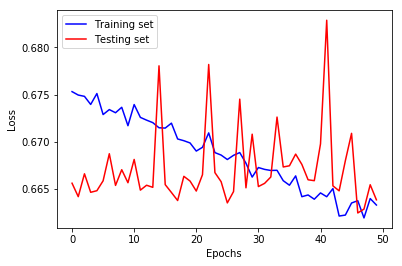

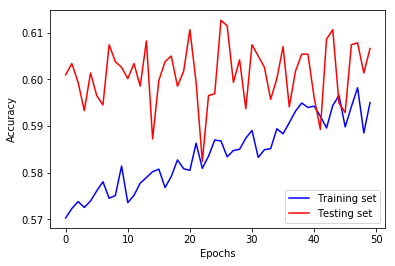

In [0]:
plot_hist_loss(hist_LightLSTM)
plot_hist_accuracy(hist_LightLSTM)

### Cross validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

estimator = KerasClassifier(build_fn=lstm0, nodes = 50, epochs=20, batch_size=200, input_shape =X_train_scaled.shape[1:], dropout = 0.1, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(estimator, X_train, y_train[:,0], cv=kfold, scoring='accuracy')
print(np.shape(y_train[:, 0]))
print('Cross Validation: Accuracy')
print("%.2f%% (+/- %.2f%%)" % (results.mean(), results.std()))

Epoch 1/20
19804/19804 [==============================] - 20s 1ms/step - loss: 0.7055 - categorical_accuracy: 0.5046
Epoch 2/20
19804/19804 [==============================] - 13s 663us/step - loss: 0.6946 - categorical_accuracy: 0.5065
Epoch 3/20
19804/19804 [==============================] - 13s 641us/step - loss: 0.6934 - categorical_accuracy: 0.5116
Epoch 4/20
19804/19804 [==============================] - 13s 636us/step - loss: 0.6937 - categorical_accuracy: 0.5031
Epoch 5/20
19804/19804 [==============================] - 13s 636us/step - loss: 0.6929 - categorical_accuracy: 0.5120
Epoch 6/20
19804/19804 [==============================] - 13s 634us/step - loss: 0.6919 - categorical_accuracy: 0.5176
Epoch 7/20
19804/19804 [==============================] - 13s 643us/step - loss: 0.6924 - categorical_accuracy: 0.5211
Epoch 8/20
19804/19804 [==============================] - 13s 635us/step - loss: 0.6925 - categorical_accuracy: 0.5113
Epoch 9/20
19804/19804 [==========================

### **Parameter tuning**

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# grid search epochs, batch size and optimizer
epochs = [5]
n_hidden_neurons = [10, 50]
batch_size = [128, 256]
dropout = [0, 0.1]
input_shape = [X_train_scaled.shape[1:]]
param_grid = dict( nodes = n_hidden_neurons, batch_size = batch_size, epochs = epochs, input_shape =input_shape, dropout= dropout )
estimator = KerasClassifier(build_fn=lstm0,  verbose=1)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring = 'accuracy', cv =3)
grid_result = grid.fit(X_train_scaled, y_train[:,0])

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
16504/16504 [==============================] - 18s 1ms/step - loss: 0.6921 - categorical_accuracy: 0.5316
Epoch 2/5
16504/16504 [==============================] - 16s 965us/step - loss: 0.6855 - categorical_accuracy: 0.5546
Epoch 3/5
16504/16504 [==============================] - 16s 968us/step - loss: 0.6807 - categorical_accuracy: 0.5636
Epoch 4/5
16504/16504 [==============================] - 16s 971us/step - loss: 0.6780 - categorical_accuracy: 0.5700
Epoch 5/5
16504/16504 [==============================] - 6s 374us/step
Epoch 1/5
16504/16504 [==============================] - 18s 1ms/step - loss: 0.6942 - categorical_accuracy: 0.5187
Epoch 2/5
16504/16504 [==============================] - 16s 971us/step - loss: 0.6879 - categorical_accuracy: 0.5355
Epoch 3/5
16504/16504 [==============================] - 16s 958us/step - loss: 0.6849 - categorical_accuracy: 0.5490
Epoch 4/5
16504/16504 [==============================] - 16s 967us/step - loss: 0.6825 - categorical_accura

### **三层LSTM**

In [0]:
def LSTM_Three_Layers(input_shape, nodes,rec_dropout,dropout):
    """ 使用三层LSTM构建循环神经网络 """
    model=Sequential()
    # 添加三层LSTM
    model.add(LSTM(nodes, return_sequences=True, recurrent_dropout=rec_dropout, dropout=dropout, input_shape=input_shape, use_bias= True))
    model.add(LSTM(nodes, return_sequences=True, recurrent_dropout=rec_dropout, dropout=dropout, use_bias= True))
    model.add(LSTM(nodes, recurrent_dropout=rec_dropout, dropout=dropout, use_bias= True))
    model.add(Dense(50, activation='relu', use_bias= True))
    model.add(Dense(2,activation='softmax'))
    adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=[metrics.categorical_accuracy])
    return(model)
  
MultiLSTM_Model = LSTM_Three_Layers(X_train_scaled.shape[1:], 30, 0.25, 0.2)
print(MultiLSTM_Model.summary())
hist_MultiLSTM = MultiLSTM_Model.fit(X_train_scaled, y_train, validation_split=0.1, batch_size=2000, epochs=50, shuffle=True, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 50, 30)            6120      
_________________________________________________________________
lstm_20 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_21 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 102       
Total params: 22,412
Trainable params: 22,412
Non-trainable params: 0
_________________________________________________________________
None
Train on 22280 samples, validate on 2476 samples
Epoch 1/50
22280/22280 [==============================] - 11s 473us/step - loss: 0.6

In [0]:
score_MultiLSTM = MultiLSTM_Model.evaluate(X_test_scaled, y_test, verbose=1)
print(score_MultiLSTM)

2751/2751 [==============================] - 8s 3ms/step
[0.6931244891065115, 0.5517993455408097]


In [0]:
MultiLSTM_Model.save('MultiLSTM_Model')

from keras.models import load_model

MultiLSTM_Model = load_model('MultiLSTM_Model')
hist_MultiLSTM = MultiLSTM_Model.fit(X_train_scaled, y_train,validation_split=0.1, batch_size=1000, epochs=100, verbose=1)

Train on 22280 samples, validate on 2476 samples
Epoch 1/100
22280/22280 [==============================] - 13s 592us/step - loss: 0.6498 - categorical_accuracy: 0.6157 - val_loss: 0.6623 - val_categorical_accuracy: 0.6054
Epoch 2/100
22280/22280 [==============================] - 9s 425us/step - loss: 0.6513 - categorical_accuracy: 0.6079 - val_loss: 0.6653 - val_categorical_accuracy: 0.5965
Epoch 3/100
22280/22280 [==============================] - 10s 428us/step - loss: 0.6473 - categorical_accuracy: 0.6146 - val_loss: 0.6712 - val_categorical_accuracy: 0.5969
Epoch 4/100
22280/22280 [==============================] - 10s 428us/step - loss: 0.6456 - categorical_accuracy: 0.6160 - val_loss: 0.6654 - val_categorical_accuracy: 0.5925
Epoch 5/100
22280/22280 [==============================] - 10s 429us/step - loss: 0.6480 - categorical_accuracy: 0.6154 - val_loss: 0.6641 - val_categorical_accuracy: 0.5998
Epoch 6/100
22280/22280 [==============================] - 10s 428us/step - loss: 

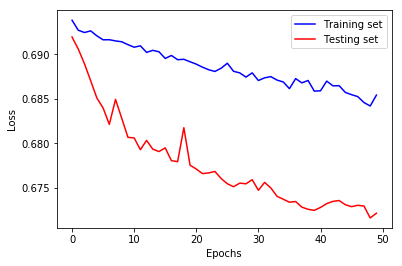

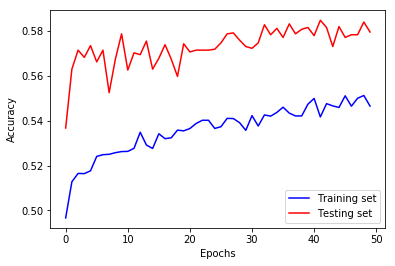

In [0]:
plot_hist_loss(hist_MultiLSTM)
plot_hist_accuracy(hist_MultiLSTM)